## 2. Data formats

One of the most convenient features of **earthkit** is *format-agnosticism* - that is, earthkit helps you focus on analysing and visualising your data using the same tools and workflows no matter the format.

In this section, we will explore visualising data from different file formats in **earthkit-maps**.

In [1]:
import earthkit.data
import earthkit.maps

### GRIB and NetCDF

Two of the most commonly used data formats for gridded weather and climate science data are **GRIB** and **NetCDF**. This example demonstrates that the features of **earthkit-maps** work equivalently with both data formats.

Let's start by getting the same sample data we used in the introduction examples - ERA5 monthly average temperature data in GRIB format.

In [2]:
earthkit.data.download_example_file("era5-2m-temperature-dec-1993.grib")
grib_data = earthkit.data.from_source("file", "era5-2m-temperature-dec-1993.grib")

Now let's convert this data to NetCDF format, and open the result using **earthkit-data**.

In [3]:
grib_data.to_xarray().to_netcdf("era5-2m-temperature-dec-1993.nc")
netcdf_data = earthkit.data.from_source("file", "era5-2m-temperature-dec-1993.nc")

Now let's try calling `earthkit.maps.quickplot` on both pieces of data, and see what the result looks like. Note that in this case we're passing `show=False` to `quickplot`, which allows us to intercept the generated `Chart` object and modify the titles so that we can more easily identify which data is GRIB and which is NetCDF.

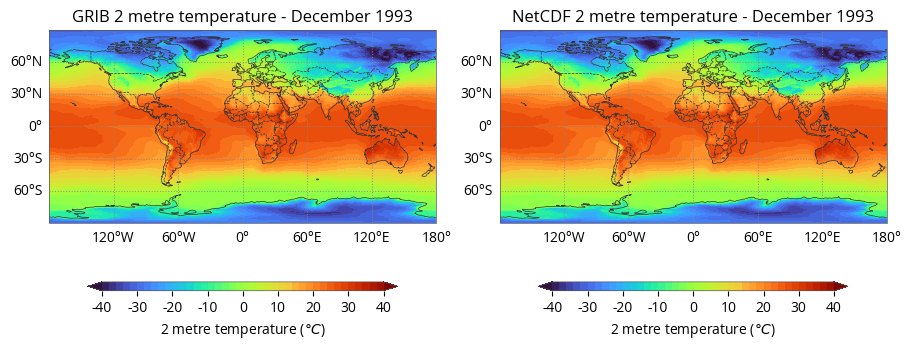

In [4]:
chart = earthkit.maps.quickplot(grib_data, netcdf_data, units="celsius", disjoint=True, show=False)
chart[0].title("GRIB {variable_name} - {time:%B %Y}")
chart[1].title("NetCDF {variable_name} - {time:%B %Y}")
chart.show()

As expected, they look identical! The automatic styling and metadata detection work with the same keys for each data format, and the plotted image is exactly the same for each.

### GeoTIFF

Coming soon!